In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
# clone  official darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15050, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 15050 (delta 16), reused 34 (delta 14), pack-reused 15002
Receiving objects: 100% (15050/15050), 13.45 MiB | 8.93 MiB/s, done.
Resolving deltas: 100% (10214/10214), done.
Checking out files: 100% (2028/2028), done.


In [4]:
def display(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


In [5]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/drive/My Drive/darknet


In [6]:
# make darknet files
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [7]:
# Place Custom yolov4 configuration file to darknet folder
!cp '/content/drive/MyDrive/yolov4/yolov4-obj.cfg' ./cfg

In [8]:
# move imp files also to darknet folder
!cp '/content/drive/MyDrive/yolov4/obj.names' ./data
!cp '/content/drive/MyDrive/yolov4/obj.data'  ./data

In [9]:
# Placing scripts to the darknet dir
!cp '/content/drive/MyDrive/yolov4/generate_train.py' ./
!cp '/content/drive/MyDrive/yolov4/generate_test.py' ./

In [10]:
!rm '/content/drive/MyDrive/darknet/src/image.c'
!cp '/content/drive/MyDrive/yolov4/image.c' '/content/drive/MyDrive/darknet/src/image.c'

In [11]:
# Test mode
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

/content/drive/My Drive/darknet/cfg
/content/drive/My Drive/darknet


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv   

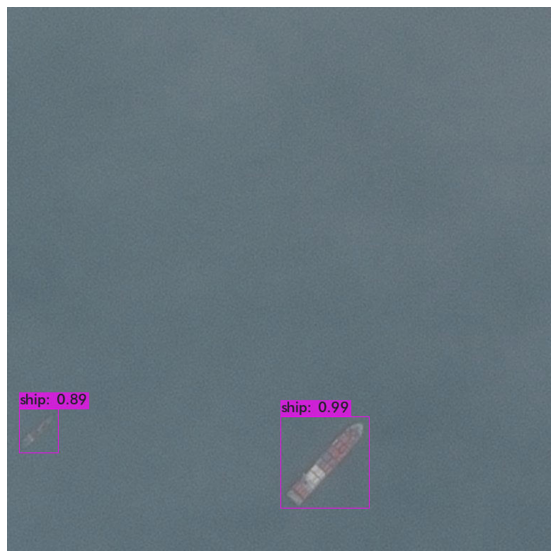

In [12]:
import cv2
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg '/content/drive/MyDrive/yolov4/backup/yolov4-obj_best.weights' '/content/drive/MyDrive/yolov4/Testing/TestImages/3.jpg' -thresh 0.4 
img=cv2.imread('predictions.jpg')
cv2.imwrite("/content/drive/MyDrive/yolov4/Testing/Yolo_Predicted/3.jpg",img)
display("predictions.jpg")

In [ ]:
# Only for Accuracy Images set
"""
import glob
import shutil
for img in sorted(glob.glob("/content/drive/MyDrive/yolov4/Testing/AccurracyImages/*.jpg")):
  file_name=img.split("/")[-1]
  file_name=file_name.split(".")[0]
  file_name=file_name+".txt"
  fl="/content/drive/MyDrive/yolov4/Testing/AccuracyFiles/"+file_name
  !./darknet detector test data/obj.data cfg/yolov4-obj.cfg '/content/drive/MyDrive/yolov4/backup/yolov4-obj_best.weights' $img -thresh 0.4 
  shutil.copyfile('preds.txt',fl)
"""

Streaming output truncated to the last 5000 lines.
nms_kind: greedynms (1), beta = 0.600000 
 140 route  136 		                           ->   52 x  52 x 128 
 141 conv    256       3 x 3/ 2     52 x  52 x 128 ->   26 x  26 x 256 0.399 BF
 142 route  141 126 	                           ->   26 x  26 x 512 
 143 conv    256       1 x 1/ 1     26 x  26 x 512 ->   26 x  26 x 256 0.177 BF
 144 conv    512       3 x 3/ 1     26 x  26 x 256 ->   26 x  26 x 512 1.595 BF
 145 conv    256       1 x 1/ 1     26 x  26 x 512 ->   26 x  26 x 256 0.177 BF
 146 conv    512       3 x 3/ 1     26 x  26 x 256 ->   26 x  26 x 512 1.595 BF
 147 conv    256       1 x 1/ 1     26 x  26 x 512 ->   26 x  26 x 256 0.177 BF
 148 conv    512       3 x 3/ 1     26 x  26 x 256 ->   26 x  26 x 512 1.595 BF
 149 conv     18       1 x 1/ 1     26 x  26 x 512 ->   26 x  26 x  18 0.012 BF
 150 yolo
[yolo] params: iou loss: ciou (4), iou_norm: 0.07, obj_norm: 1.00, cls_norm: 1.00, delta_norm: 1.00, scale_x_y: 1.10
nms_k